# Preprocessing

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from ipywidgets import interact
#from scipy.stats import pearsonr, chi2_contingency
from sklearn.utils import resample
from sklearn import utils

from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit,cross_val_score,learning_curve
from sklearn.metrics import confusion_matrix, classification_report, f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
 

from sklearn.pipeline import make_pipeline

In [2]:
df = pd.read_excel('Dataset.xlsx')
Data = df.copy()

In [3]:
Data.rename(columns={'TDT':'Type_Douleur_Thoracique',
                   'PAR': 'Pression_Arterielle_Repos',
                   'GAJ':'Glycemie_A_Jeun',
                   'ECG':'Electrocardiogramme_repos',
                  'FCMAX':'Frequence_Cardiaque_Max'}, inplace=True)
Data.head(5)

,AGE,SEXE,Type_Douleur_Thoracique,Pression_Arterielle_Repos,CHOLESTEROL,Glycemie_A_Jeun,Electrocardiogramme_repos,Frequence_Cardiaque_Max,ANGINE,DEPRESSION,PENTE,CŒUR
0,40,homme,AA,140,289,0,Normal,172,Non,0.0,Ascendant,0
1,49,femme,DNA,160,180,0,Normal,156,Non,1.0,Plat,1
2,37,homme,AA,130,283,0,ST,98,Non,0.0,Ascendant,0
3,48,femme,ASY,138,214,0,Normal,108,Oui,1.5,Plat,1
4,54,homme,DNA,150,195,0,Normal,122,Non,0.0,Ascendant,0


In [4]:
Data_Quali = Data.select_dtypes("object")
Data_Quanti = Data.select_dtypes(exclude=object)
Data_Quanti = Data_Quanti.drop('CŒUR', axis=1)

### Normalisation des variables quantitatives

In [5]:
normaliser = RobustScaler()
norm = normaliser.fit_transform(Data_Quanti)
norm

array([[-1.07692308,  0.5       ,  0.704     ,  0.        ,  0.94444444,
        -0.4       ],
       [-0.38461538,  1.5       , -0.45866667,  0.        ,  0.5       ,
         0.26666667],
       [-1.30769231,  0.        ,  0.64      ,  0.        , -1.11111111,
        -0.4       ],
       ...,
       [ 0.23076923,  0.        , -0.98133333,  0.        , -0.63888889,
         0.4       ],
       [ 0.23076923,  0.        ,  0.13866667,  0.        ,  1.        ,
        -0.4       ],
       [-1.23076923,  0.4       , -0.512     ,  0.        ,  0.97222222,
        -0.4       ]])

In [6]:
Quanti = ['AGE', 'PAR', 'CHOLESTEROL', 'GAJ', 'FCMAX', 'DEPRESSION']

In [7]:
Data_Quanti = pd.DataFrame(norm, columns=Quanti)
Data_Quanti

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION
0,-1.076923,0.5,0.704000,0.0,0.944444,-0.400000
1,-0.384615,1.5,-0.458667,0.0,0.500000,0.266667
2,-1.307692,0.0,0.640000,0.0,-1.111111,-0.400000
3,-0.461538,0.4,-0.096000,0.0,-0.833333,0.600000
4,0.000000,1.0,-0.298667,0.0,-0.444444,-0.400000
...,...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,0.0,-0.166667,0.400000
914,1.076923,0.7,-0.320000,1.0,0.083333,1.866667
915,0.230769,0.0,-0.981333,0.0,-0.638889,0.400000
916,0.230769,0.0,0.138667,0.0,1.000000,-0.400000


In [8]:
Data_Quanti['CŒUR'] = df['CŒUR']
Data_Quanti

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR
0,-1.076923,0.5,0.704000,0.0,0.944444,-0.400000,0
1,-0.384615,1.5,-0.458667,0.0,0.500000,0.266667,1
2,-1.307692,0.0,0.640000,0.0,-1.111111,-0.400000,0
3,-0.461538,0.4,-0.096000,0.0,-0.833333,0.600000,1
4,0.000000,1.0,-0.298667,0.0,-0.444444,-0.400000,0
...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,0.0,-0.166667,0.400000,1
914,1.076923,0.7,-0.320000,1.0,0.083333,1.866667,1
915,0.230769,0.0,-0.981333,0.0,-0.638889,0.400000,1
916,0.230769,0.0,0.138667,0.0,1.000000,-0.400000,1


In [9]:
#Quali = ['SEXE','TDT','ECG','ANGINE','PENTE']

In [10]:
for col in Data.select_dtypes("object"):
    print(col, Data[col].unique())

SEXE ['homme' 'femme']
Type_Douleur_Thoracique ['AA' 'DNA' 'ASY' 'AT']
Electrocardiogramme_repos ['Normal' 'ST' 'LVH']
ANGINE ['Non' 'Oui']
PENTE ['Ascendant' 'Plat' 'Descendant']


In [11]:
Data_Quali = pd.get_dummies(Data_Quali , dummy_na = False)
Data_Quali

,SEXE_femme,SEXE_homme,Type_Douleur_Thoracique_AA,Type_Douleur_Thoracique_ASY,Type_Douleur_Thoracique_AT,Type_Douleur_Thoracique_DNA,Electrocardiogramme_repos_LVH,Electrocardiogramme_repos_Normal,Electrocardiogramme_repos_ST,ANGINE_Non,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,0,1,1,0,0,0,0,1,0,1,0,1,0,0
1,1,0,0,0,0,1,0,1,0,1,0,0,0,1
2,0,1,1,0,0,0,0,0,1,1,0,1,0,0
3,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,0,1,0,0,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0,1,0,0,1,0,0,1,0,1,0,0,0,1
914,0,1,0,1,0,0,0,1,0,1,0,0,0,1
915,0,1,0,1,0,0,0,1,0,0,1,0,0,1
916,1,0,1,0,0,0,1,0,0,1,0,0,0,1


In [12]:
Data = pd.concat([Data_Quanti, Data_Quali], axis=1)
Data

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR,SEXE_femme,SEXE_homme,Type_Douleur_Thoracique_AA,...,Type_Douleur_Thoracique_AT,Type_Douleur_Thoracique_DNA,Electrocardiogramme_repos_LVH,Electrocardiogramme_repos_Normal,Electrocardiogramme_repos_ST,ANGINE_Non,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,-1.076923,0.5,0.704000,0.0,0.944444,-0.400000,0,0,1,1,...,0,0,0,1,0,1,0,1,0,0
1,-0.384615,1.5,-0.458667,0.0,0.500000,0.266667,1,1,0,0,...,0,1,0,1,0,1,0,0,0,1
2,-1.307692,0.0,0.640000,0.0,-1.111111,-0.400000,0,0,1,1,...,0,0,0,0,1,1,0,1,0,0
3,-0.461538,0.4,-0.096000,0.0,-0.833333,0.600000,1,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0.000000,1.0,-0.298667,0.0,-0.444444,-0.400000,0,0,1,0,...,0,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,-0.692308,-1.0,0.437333,0.0,-0.166667,0.400000,1,0,1,0,...,1,0,0,1,0,1,0,0,0,1
914,1.076923,0.7,-0.320000,1.0,0.083333,1.866667,1,0,1,0,...,0,0,0,1,0,1,0,0,0,1
915,0.230769,0.0,-0.981333,0.0,-0.638889,0.400000,1,0,1,0,...,0,0,0,1,0,0,1,0,0,1
916,0.230769,0.0,0.138667,0.0,1.000000,-0.400000,1,1,0,1,...,0,0,1,0,0,1,0,0,0,1


In [13]:
pd.set_option('max_columns', None)
Data = pd.concat([Data_Quanti, Data_Quali] , axis = 1 )
Data.head(5)

,AGE,PAR,CHOLESTEROL,GAJ,FCMAX,DEPRESSION,CŒUR,SEXE_femme,SEXE_homme,Type_Douleur_Thoracique_AA,Type_Douleur_Thoracique_ASY,Type_Douleur_Thoracique_AT,Type_Douleur_Thoracique_DNA,Electrocardiogramme_repos_LVH,Electrocardiogramme_repos_Normal,Electrocardiogramme_repos_ST,ANGINE_Non,ANGINE_Oui,PENTE_Ascendant,PENTE_Descendant,PENTE_Plat
0,-1.076923,0.5,0.704000,0.0,0.944444,-0.400000,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0
1,-0.384615,1.5,-0.458667,0.0,0.500000,0.266667,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1
2,-1.307692,0.0,0.640000,0.0,-1.111111,-0.400000,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0
3,-0.461538,0.4,-0.096000,0.0,-0.833333,0.600000,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1
4,0.000000,1.0,-0.298667,0.0,-0.444444,-0.400000,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0


In [14]:
X = Data.drop(['CŒUR'], axis=1)
y = Data['CŒUR'] 

In [15]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size = 0.3, random_state = 0,stratify = y)

In [16]:
X_val, X_test, y_val, y_test =  train_test_split(X_test, y_test, test_size = 0.5, random_state = 0, stratify = y_test)

In [17]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(642, 20)
(642,)
(138, 20)
(138,)
(138, 20)
(138,)


In [18]:
X2 = X_train
X2['CŒUR'] = y_train.values

In [19]:
X2['CŒUR'].value_counts()

1    355
0    287
Name: CŒUR, dtype: int64

In [20]:
# on definie les classes minoritaire et majoritaires
Maj = X2[X2.CŒUR == 1]
Min = X2[X2.CŒUR == 0]

In [21]:
# augmentons la plus petite classe 
Min = resample(Min, replace = True, n_samples = len(Maj))
Min['CŒUR'].value_counts()

0    355
Name: CŒUR, dtype: int64

In [22]:
Datas = pd.concat([Maj, Min])

In [23]:
X_train = Datas.drop(['CŒUR'], axis=1)
y_train = Datas['CŒUR']

## Modélisation

In [24]:
# Modèle d'arbre de décision
model_A = DecisionTreeClassifier(random_state=1)

In [25]:
def evaluation(model_A):
    model_A.fit(X_train, y_train)
    y_pred = model_A.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model_A, X_train, y_train, cv=4, scoring = 'f1', train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize = (10,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score' )
    plt.plot(N, val_score.mean(axis=1), label= 'Validation score' )
    plt.legend()

[[47 15]
 [13 63]]
              precision    recall  f1-score   support

           0       0.78      0.76      0.77        62
           1       0.81      0.83      0.82        76

    accuracy                           0.80       138
   macro avg       0.80      0.79      0.79       138
weighted avg       0.80      0.80      0.80       138



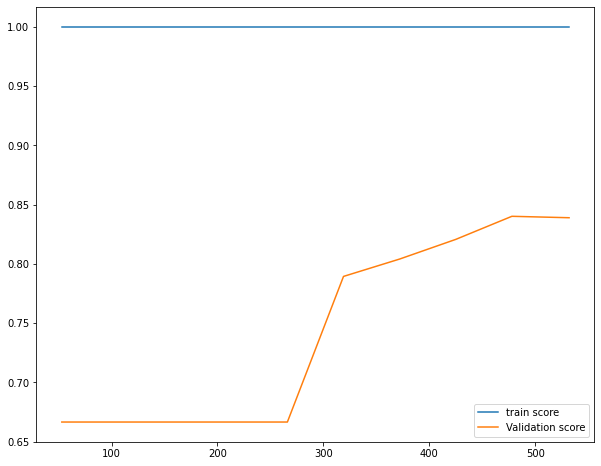

In [26]:
evaluation(model_A)

## Feature Selection

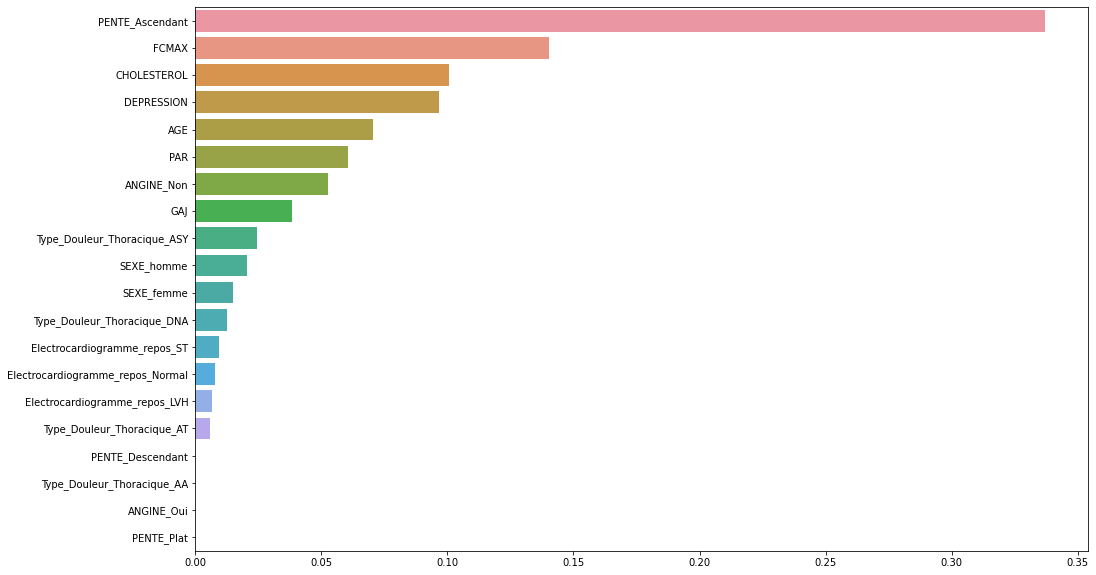

In [27]:
var_importante = pd.Series(model_A.feature_importances_ , index = X_train.columns).sort_values(ascending = False)

plt.figure(figsize=(16,10))
sns.barplot(x = var_importante, y = var_importante.index)
plt.show()

In [28]:
def Feature_evaluate(feature_list):
    print('TRAINING WITH '+str(len(feature_list)) + ' ', feature_list )
    model = RandomForestClassifier(random_state=0)
    model.fit(X_train[feature_list], y_train)
    ypred = model.predict(X_test[feature_list])
    print(classification_report(y_test, ypred))
    print(" "*50)
    print("-----"*50)
    print(" "*50)


In [29]:
for i in range(len(var_importante.index)):
    Feature_evaluate(var_importante.sort_values(ascending=False).index[0: i+1])

TRAINING WITH 1  Index(['PENTE_Ascendant'], dtype='object')
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        62
           1       0.85      0.75      0.80        76

    accuracy                           0.79       138
   macro avg       0.79      0.79      0.79       138
weighted avg       0.80      0.79      0.79       138

                                                  
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                  
TRAINING WITH 2  Index(['PENTE_Ascendant', 'FCMAX'], dtype='object')
              precision    recall  f1-score   support

           0       0.72      0.81      0.76        62
           1       0.83      0.75      0.79        76

    accuracy               

              precision    recall  f1-score   support

           0       0.82      0.89      0.85        62
           1       0.90      0.84      0.87        76

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.87      0.86      0.86       138

                                                  
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                  
TRAINING WITH 13  Index(['PENTE_Ascendant', 'FCMAX', 'CHOLESTEROL', 'DEPRESSION', 'AGE', 'PAR',
       'ANGINE_Non', 'GAJ', 'Type_Douleur_Thoracique_ASY', 'SEXE_homme',
       'SEXE_femme', 'Type_Douleur_Thoracique_DNA',
       'Electrocardiogramme_repos_ST'],
      dtype='object')
              precision    recall  f1

              precision    recall  f1-score   support

           0       0.83      0.87      0.85        62
           1       0.89      0.86      0.87        76

    accuracy                           0.86       138
   macro avg       0.86      0.86      0.86       138
weighted avg       0.86      0.86      0.86       138

                                                  
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
                                                  


##### Les variables que nous retenons sont les suivantes:
['PENTE_Acendant', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION', 'PAR', 'AGE','Type_Douleur_Thoracique_ASY', 'GAJ','Electrocardiogramme_repos_Normal', 'Electrocardiogramme_repos_ST','SEXE_homme']

In [30]:
X_train = X_train[['PENTE_Ascendant', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION', 'PAR', 'AGE','Type_Douleur_Thoracique_ASY', 'GAJ','Electrocardiogramme_repos_Normal', 'Electrocardiogramme_repos_ST','SEXE_homme']]
X_val = X_val[['PENTE_Ascendant', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION', 'PAR', 'AGE','Type_Douleur_Thoracique_ASY', 'GAJ','Electrocardiogramme_repos_Normal', 'Electrocardiogramme_repos_ST','SEXE_homme']]
X_test = X_test[['PENTE_Ascendant', 'CHOLESTEROL', 'FCMAX', 'DEPRESSION', 'PAR', 'AGE','Type_Douleur_Thoracique_ASY', 'GAJ','Electrocardiogramme_repos_Normal', 'Electrocardiogramme_repos_ST','SEXE_homme']]

In [31]:
model_DTree = DecisionTreeClassifier(random_state=0)
model_Ad = AdaBoostClassifier(random_state=0)
model_KnC = KNeighborsClassifier()
modeL_Log = LogisticRegression(random_state = 0)
model_SVC = SVC(random_state = 0)
model_Bg = BaggingClassifier(n_estimators=100)
model_RandF = RandomForestClassifier(random_state = 0)


In [32]:
modelList = ['model_DTree','model_Ad','model_KnC','modeL_Log','model_SVC','model_Bg','model_RandF']

In [42]:
def evaluation(model_A):
    model_A.fit(X_train, y_train)
    y_pred = model_A.predict(X_test)
    
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    N, train_score, val_score = learning_curve(model_A, X_train, y_train, cv=4, scoring = 'f1', train_sizes = np.linspace(0.1, 1, 10))
    plt.figure(figsize = (10,8))
    plt.plot(N, train_score.mean(axis=1), label= 'train score' )
    plt.plot(N, val_score.mean(axis=1), label= 'Validation score' )
    plt.legend()

In [44]:
#evaluation(modelList)

In [45]:
def model_evaluation(model_list):
    
    for item in model_list:
        model_list.fit(X_train, y_train)
        y_pred = model_list.predict(X_test)
    
        print(confusion_matrix(y_test, y_pred))
        print(f"Évalution du modèle: {item}\n")
        print(classification_report(y_test, y_pred))     
        print('=='*50)
        
        N, train_score, val_score = learning_curve(model_list, X_train, y_train,
                                                    cv=4, scoring = 'f1', 
                                                    train_sizes=np.linspace(0.1, 1, 10))
        plt.figure(figsize=(8,4))
        plt.title(f"Courbe train-test du modèle {item}")
        plt.plot(N, train_score.mean(axis=1), label='train score')
        plt.plot(N, val_score.mean(axis=1), label='validation score')
        plt.legend()

In [46]:
model_evaluation(modelList)

AttributeError: 'list' object has no attribute 'fit'

### Preprocessing 

En premier lieu, renommons nos variables pour une meilleur manipulation et compréhension.
Ensuite, normalisons nos variables quantitatives avec Robuscaler () et encodons nos variables qualitatives avec get_dummies.

Découpons maintenant notre dataset en données d'entrainement et de test.
Quand nos regardons les dimensions de nos différents données, nous remarquons qu'il n'y a pas de bonnes propositions de nos variables, cela peut affecter nos modèles.
Pour resoudre cela, 

 
### Feature Selection

Nous remarquons qu'après 